In [ ]:
#pip install geopandas

In [ ]:
#import geopandas as gpd

In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
import descartes
from matplotlib import pyplot
import mapclassify as mc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import adjustText as aT

In [11]:
chicago = gpd.read_file('Boundaries - ZIP Codes') #reading in shp 
chicago

,objectid,shape_area,shape_len,zip,geometry
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917..."
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922..."
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909..."
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895..."
...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830..."
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757..."
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721..."
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795..."


In [12]:
totalData = pd.read_csv('COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code_newly.csv') #reading in csv
totalData
#head(totaData)

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60603,10,03/01/2020,03/07/2020,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-10,POINT (-87.625473 41.880112)
1,60603,11,03/08/2020,03/14/2020,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-11,POINT (-87.625473 41.880112)
2,60603,12,03/15/2020,03/21/2020,NaN,NaN,NaN,NaN,1.0,1,...,85.2,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-12,POINT (-87.625473 41.880112)
3,60603,13,03/22/2020,03/28/2020,NaN,NaN,NaN,NaN,3.0,4,...,340.7,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-13,POINT (-87.625473 41.880112)
4,60603,14,03/29/2020,04/04/2020,NaN,NaN,NaN,NaN,6.0,10,...,851.8,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-14,POINT (-87.625473 41.880112)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,Unknown,24,06/07/2020,06/13/2020,4.0,98.0,0.0,0.0,2581.0,21190,...,0.0,0.1,0.2,0,4,0.0,0.0,0,Unknown-2020-24,NaN
3476,60707,5,01/31/2021,02/06/2021,26.0,1998.0,60.0,4644.5,NaN,4389,...,10202.5,0.0,0.1,2,38,4.6,88.3,43019,60707-2021-5,POINT (-87.808283 41.921777)
3477,60707,6,02/07/2021,02/13/2021,13.0,2011.0,30.0,4674.7,NaN,4389,...,10202.5,0.0,0.1,0,38,0.0,88.3,43019,60707-2021-6,POINT (-87.808283 41.921777)
3478,60707,7,02/14/2021,02/20/2021,13.0,2024.0,30.0,4704.9,NaN,4389,...,10202.5,0.0,0.1,0,38,0.0,88.3,43019,60707-2021-7,POINT (-87.808283 41.921777)


In [35]:
df = pd.read_csv('COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code_newly.csv') #reading in csv
df = df.dropna()
df = df.loc[df['Week Number'] == 16]
df

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
73,60615,16,04/12/2020,04/18/2020,39.0,171.0,94.0,411.4,217.0,850,...,2045.1,0.2,0.2,1,5,2.4,12.0,41563,60615-2020-16,POINT (-87.602725 41.801993)
122,60654,16,04/12/2020,04/18/2020,18.0,103.0,94.0,538.3,61.0,266,...,1390.1,0.1,0.2,0,0,0.0,0.0,19135,60654-2020-16,POINT (-87.636354 41.892485)
236,60606,16,04/12/2020,04/18/2020,6.0,13.0,194.0,419.2,34.0,130,...,4192.2,0.4,0.2,0,0,0.0,0.0,3101,60606-2020-16,POINT (-87.63676 41.882634)
347,60613,16,04/12/2020,04/18/2020,36.0,184.0,72.0,367.2,164.0,633,...,1263.1,0.2,0.2,3,8,6.0,16.0,50113,60613-2020-16,POINT (-87.661343 41.953742)
385,60611,16,04/12/2020,04/18/2020,8.0,72.0,25.0,222.0,123.0,514,...,1585.1,0.1,0.1,0,0,0.0,0.0,32426,60611-2020-16,POINT (-87.620291 41.894734)
423,60612,16,04/12/2020,04/18/2020,66.0,271.0,192.0,789.8,286.0,1090,...,3176.8,0.3,0.3,3,10,8.7,29.1,34311,60612-2020-16,POINT (-87.687011 41.88004)
595,60623,16,04/12/2020,04/18/2020,241.0,566.0,280.0,658.3,462.0,1193,...,1387.5,0.5,0.4,9,24,10.5,27.9,85979,60623-2020-16,POINT (-87.717446 41.850321)
632,60622,16,04/12/2020,04/18/2020,57.0,225.0,108.0,426.2,245.0,822,...,1557.0,0.2,0.2,9,12,17.0,22.7,52793,60622-2020-16,POINT (-87.681818 41.902762)
710,60637,16,04/12/2020,04/18/2020,57.0,233.0,120.0,491.0,247.0,989,...,2084.1,0.2,0.2,4,8,8.4,16.9,47454,60637-2020-16,POINT (-87.604053 41.780991)
713,60640,16,04/12/2020,04/18/2020,146.0,321.0,209.0,460.4,332.0,917,...,1315.4,0.3,0.3,6,14,8.6,20.1,69715,60640-2020-16,POINT (-87.662232 41.971888)


In [18]:
merged = chicago.merge(df, left_on='zip', right_on='ZIP Code', how='left') #merge into gdf (with all states)
merged

,objectid,shape_area,shape_len,zip,geometry,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917...",60647,1.0,01/03/2021,01/09/2021,327.0,...,112675.3,0.1,0.1,2.0,131.0,2.3,149.7,87509.0,60647-2021-1,POINT (-87.701101 41.921058)
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922...",60639,1.0,01/03/2021,01/09/2021,464.0,...,83731.2,0.2,0.2,5.0,198.0,5.5,218.7,90517.0,60639-2021-1,POINT (-87.75531 41.920609)
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888...",60622,1.0,01/03/2021,01/09/2021,201.0,...,124586.6,0.1,0.1,2.0,68.0,3.8,128.8,52793.0,60622-2021-1,POINT (-87.681818 41.902762)
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895...",60651,1.0,01/03/2021,01/09/2021,221.0,...,75261.8,0.1,0.2,3.0,116.0,4.7,183.5,63218.0,60651-2021-1,POINT (-87.741017 41.901964)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830...",60623,1.0,01/03/2021,01/09/2021,286.0,...,72352.6,0.1,0.2,5.0,226.0,5.8,262.9,85979.0,60623-2021-1,POINT (-87.717446 41.850321)
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757...",60629,1.0,01/03/2021,01/09/2021,509.0,...,75724.6,0.2,0.2,6.0,206.0,5.4,184.2,111850.0,60629-2021-1,POINT (-87.711565 41.777061)
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721...",60620,1.0,01/03/2021,01/09/2021,167.0,...,71688.5,0.1,0.1,4.0,121.0,5.9,177.7,68096.0,60620-2021-1,POINT (-87.651656 41.740873)
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795...",60637,1.0,01/03/2021,01/09/2021,103.0,...,151772.2,0.1,0.0,1.0,48.0,2.1,101.2,47454.0,60637-2021-1,POINT (-87.604053 41.780991)


In [19]:
merged["center"] = merged["geometry"].centroid
merged_points1 = merged.copy()
merged_points1.set_geometry("center", inplace = True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


Text(0.5, 1, 'Cases in the last week')

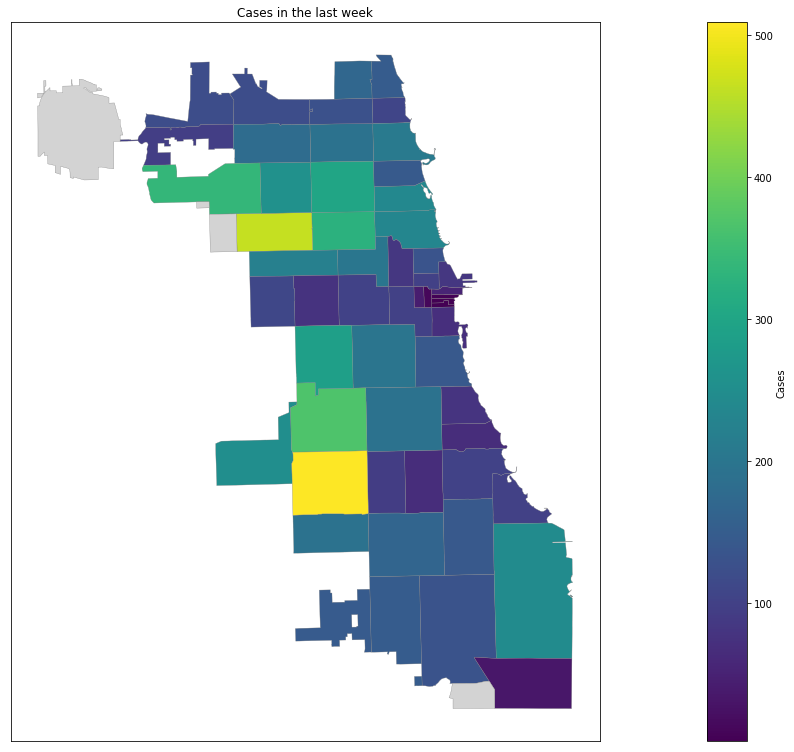

In [20]:
fig, ax = pyplot.subplots(1,1, figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged.plot(ax=ax, column='Cases - Weekly', missing_kwds={'color':'lightgrey'},
                 edgecolor='grey', linewidth=.3, legend=True, cax=cax,
                legend_kwds={'label':'Cases', 'orientation':'vertical'})
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Cases in the last week')